In [52]:
import pandas as pd

In [53]:
import plotly.express as px
from plotly import graph_objects as go

In [54]:
px.data.__all__

['carshare',
 'election',
 'election_geojson',
 'experiment',
 'gapminder',
 'iris',
 'medals_wide',
 'medals_long',
 'stocks',
 'tips',
 'wind']

#### Line Chart

In [55]:
df= px.data.stocks()
df.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


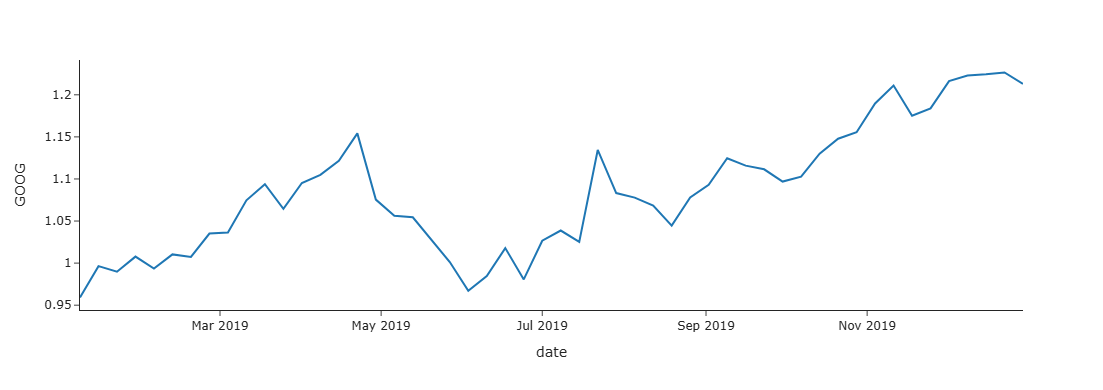

In [56]:
fig= px.line(data_frame= df[df["date"]>"2019-01-01"], x= "date", y="GOOG", width= 550, height= 390, template= "simple_white")
fig.show()

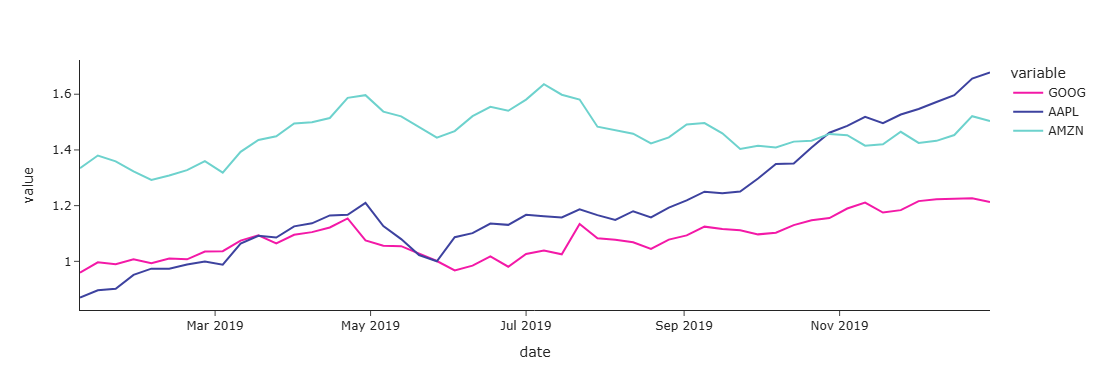

In [57]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig= px.line(data_frame= df[df["date"]>"2019-01-01"], x= "date", y= ["GOOG", "AAPL", "AMZN"], color_discrete_sequence=colors,
             width=550, height=390, template="simple_white")
fig.show()

#### Area Chart

In [58]:
px.data.gapminder().head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [59]:
df= px.data.gapminder().groupby(["year", "continent"], as_index=False).agg({"pop": "sum"}).sort_values(by=["year", "pop"], ascending=[True, False])
df.head()

,year,continent,pop
2,1952,Asia,1395357351
3,1952,Europe,418120846
1,1952,Americas,345152446
0,1952,Africa,237640501
4,1952,Oceania,10686006


In [60]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig=px.area(data_frame= df, x= "year", y= "pop", color= "continent", color_discrete_sequence= colors, template= "simple_white",
            width= 550, height= 390)
fig.show()

#### Bar Chart

In [61]:
tips= px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
sex_count= tips.sex.value_counts()
sex_count

sex
Male      157
Female     87
Name: count, dtype: int64

In [63]:
colors=('#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig= px.bar(data_frame= sex_count, x=sex_count.index, y=sex_count.values, color_discrete_sequence= colors, text_auto= True, 
               template= "simple_white", width= 550, height= 390)
fig.show()

In [64]:
long_df= px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [65]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig= px.bar(data_frame= long_df, x="nation", y="count", color="medal", color_discrete_sequence=colors, barmode="group", text_auto=True,
            template="simple_white", width=550, height=390)
fig.show()

In [66]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig=px.bar(data_frame=long_df, x="nation", y="count", color="medal", text_auto=True,color_discrete_sequence=colors,
           title="Long Form Input", template="simple_white", width=550, height=390)
fig.show()

In [67]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig=px.histogram(data_frame= long_df, x= "nation", y= "count", color= "medal", barnorm="percent", text_auto= True, color_discrete_sequence= colors,
                   template= "simple_white", width= 550, height= 390)
fig.show()

#### Histogram

In [68]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
colors=('#F319A7','#6DD2CD')
fig= px.histogram(data_frame=df, x="tip", nbins= 20, color_discrete_sequence= colors, template= "simple_white", width= 550, height= 390)
fig.show()

In [70]:
colors=('#F319A7','#6DD2CD')
fig= px.histogram(data_frame=df, x="tip", color="sex", color_discrete_sequence= colors, opacity=0.4, barmode="overlay", barnorm= "percent",
                  nbins= 20, template="simple_white", width=550, height=390)
fig.show()

#### Normalised Bar

In [71]:
df= px.data.gapminder().groupby(["year", "continent"], as_index=False).agg({"pop": "sum"}).sort_values(by=["year", "pop"], ascending=[True, False])
df.head()

,year,continent,pop
2,1952,Asia,1395357351
3,1952,Europe,418120846
1,1952,Americas,345152446
0,1952,Africa,237640501
4,1952,Oceania,10686006


In [72]:
colors=('#F319A7','#3D429F', '#6DD2CD', '#19A7F3','#F5D7E2')
fig=px.histogram(data_frame=df, x="year", y="pop", color="continent", color_discrete_sequence=colors, barnorm="percent", nbins=12,
                 template= "simple_white", width=550, height=390)
fig.show()

In [73]:
fig= px.histogram(data_frame= tips, x="sex", y="total_bill", color= "sex", barmode= "group", facet_row= "time", facet_col= "day",
            category_orders= {"day":["Thu", "Fri", "Sat", "Sun"], "time":["Lunch", "Dinner"]},template= "simple_white", width = 800, height= 500)
fig.show()

#### Funnel

In [74]:
conversions = [39, 27.4, 20.6, 11, 2]
steps = ["Website visit", "Downloads", "Potential customers", 
         "Requested price", "invoice sent"]
colors = ('#FFCFD2', '#FFCFD2', '#FFCFD2', '#FFCFD2')
fig = go.Figure(go.Funnel(x=conversions, y=steps))
fig.update_layout(width=550, height=390, colorway=colors, template="simple_white")
fig.update_yaxes(showline=False)
fig.show()

#### Pie Chart

In [75]:
tips= px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


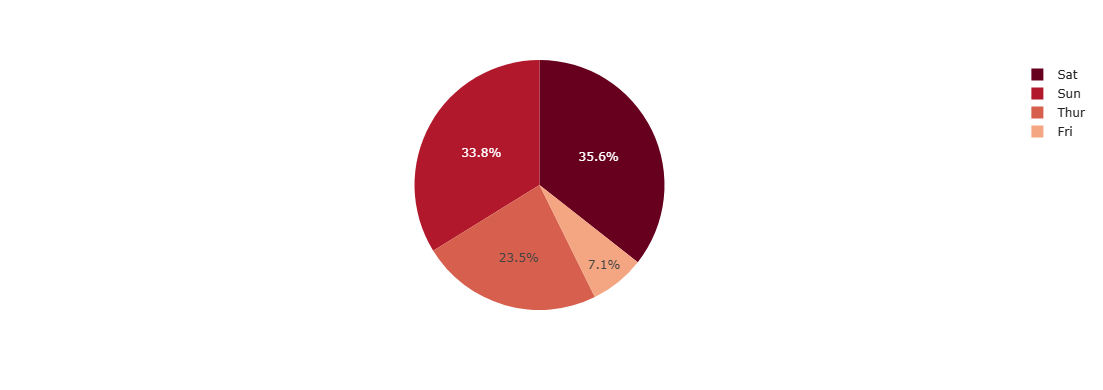

In [76]:
fig= px.pie(data_frame= tips, names= "day", values="tip", color_discrete_sequence=px.colors.sequential.RdBu, 
            width= 550, height=390, template="simple_white")
fig.show()

#### Donut Chart

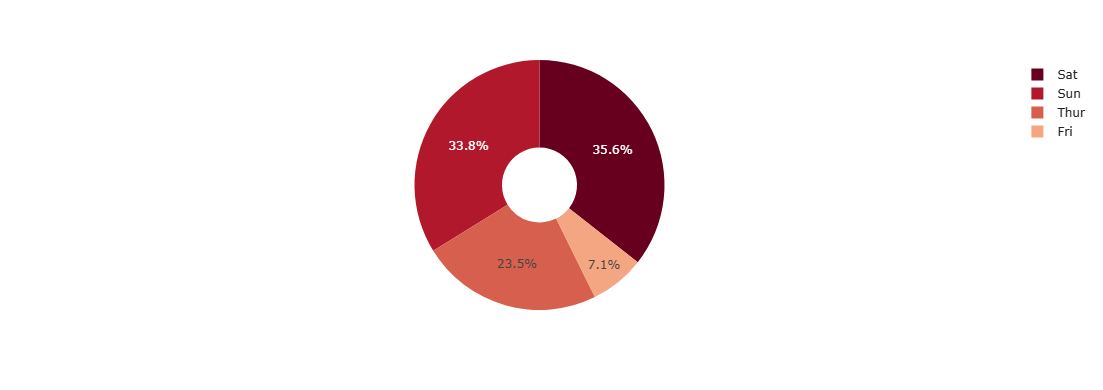

In [77]:
px.pie(data_frame= tips, names= "day", values= "tip", color_discrete_sequence=px.colors.sequential.RdBu, hole=0.3,
       width=550, height=390, template="simple_white")

#### Box Plot

In [78]:
fig= px.box(data_frame=tips, y= "total_bill", template= "simple_white", width= 550, height= 390)
fig.show()

In [79]:
fig = px.box(data_frame= tips, y="total_bill", points = "all", template="simple_white", width= 550, height= 390)
fig.show()

In [80]:
fig= px.box(data_frame=tips, x= "time", y="total_bill", template="simple_white", width= 550, height= 390)
fig.show()

In [81]:
fig= px.box(data_frame=tips, x="day", y="total_bill", color= "smoker", template= "simple_white", width= 550, height= 390)
fig.show()

#### Scatter Plot

In [82]:
iris= px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [83]:
fig= px.scatter(iris, x="sepal_width", y="sepal_length", template= "simple_white", width= 550, height= 390)
fig.show()

In [84]:
fig= px.scatter(iris, x= "sepal_width", y= "sepal_length", color="species", template= "simple_white", width= 550, height= 390)
fig.show()

In [85]:
fig= px.scatter(iris, x= "sepal_width", y= "sepal_length", color="species", size= "petal_length", hover_data= ["petal_width"],
                template= "simple_white", width= 550, height= 390)
fig.show()

In [86]:
fig= px.scatter(data_frame= tips, x="total_bill", y="tip", color= "smoker", facet_row= "time", facet_col= "smoker",
                template= "simple_white", width= 850, height= 550)
fig.show()

#### Heatmap

In [87]:
medals_wide= px.data.medals_wide(indexed=True)
medals_wide

medal,gold,silver,bronze
nation,,,
South Korea,24,13,11
China,10,15,8
Canada,9,12,12


In [88]:
fig= px.imshow(medals_wide, text_auto= True, template= "simple_white", width= 850, height= 650)
fig.show()

In [90]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


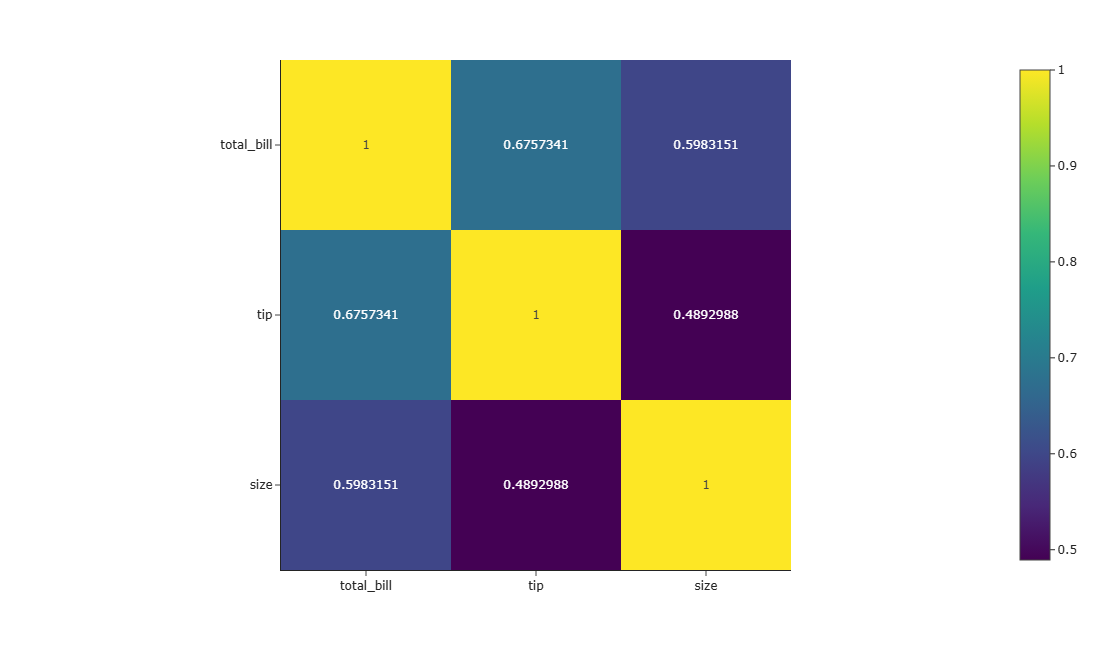

In [93]:
fig= px.imshow(tips.corr(numeric_only=True), text_auto=True, template="simple_white", width= 850, height= 650)
fig.show()